In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [2]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
#i case==2 dname=data_C.... implement on our own if we want

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

print(v.shape)

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...
(10000, 20)


In [3]:
cov_data = np.cov(v)/N

## initialize

In [4]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 2
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.72876393e-02  2.04222126e-01]
 [-2.21489412e-01 -2.36964198e-01]
 [ 8.38211653e-01  5.94150244e-01]
 [ 3.96160518e-02  1.20136963e-01]
 [ 3.27912325e-01  5.31481557e-01]
 [ 4.29466985e-01 -5.52710538e-01]
 [ 1.17256826e-01  9.76087795e-02]
 [ 5.76885677e-01  3.77974741e-01]
 [-8.53501017e-01 -1.58554191e-01]
 [ 7.11674783e-01 -1.87006764e-01]
 [-2.30146526e-01  2.03387092e-01]
 [ 1.38535434e+00 -4.35452880e-01]
 [-2.46070853e-01  5.29254898e-02]
 [ 1.29034856e-01  2.23337160e-01]
 [ 4.00935791e-04  5.73002421e-01]
 [-3.04256178e-01 -3.54405060e-01]
 [-1.01067017e+00 -7.93431066e-01]
 [-3.67028188e-01  2.38846755e-01]
 [-5.39796281e-01  5.10944576e-02]
 [-4.53483232e-01  1.41941667e-01]]
a= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957  0.12209994
  0.16117297 -0.3214583   0.14126068  0.57553201  0.02979552  0.10518219
 -0.0050578   0.4284531   0.56591768 -0.39197445 -0.6605412   0.00945954
  0.32336713 -0.28164852]
b= [0. 0.]


## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


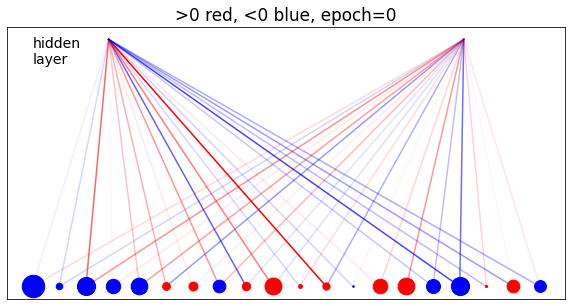

In [5]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [6]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 4
activate(v[k],w,b,GAP,info=True)

input= [0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
act= [-0.26465979  1.34505401]
prob= [0.43421858 0.79331984]
output= [0 0]


array([0, 0])

## Point 4:

If we simply use the activate function for the backward step of the contrastive divergence, we would generate vectors with 0s and 1s (activating a 1 for each component of the new vector, if a random generated number is under the probability calculated above). If we do so, however, for each 4 blocks of the vector there are $2^4$ possible states, while fot the way in which our data is structured (one-hot encoding) the ''real'' possible states are only 4: 0001,0010,0100,1000.    

Here is what I did:
- I defined a vector that contains all possible states, $s$
- for each entry of our data (a row with 20 elements) I divide it in blocks of 4;
- I compared each block of 4 with each state of s, to recognize to which state it corresponds;
- I compute the energy of the state as  $$E_{state}= \sum_{k \in block}[a_{k}+ \sum_{\nu}W_{k \nu}h_{\nu}]v_{k}$$
  where $v_{k}$ is (each time) the sub-vector of our real vector v constituded by 4 elements;

- I computed the Boltzmann's weights for each of the 4 states as $exp^{-E_{state}}$
- I calculated the normalized probability $p$.

Then, in order to have 4 intervals between 0 and 1, I calculated the cumulative probability for each state: $${C_{prob}}_i=\sum_{j\leq i}p_j$$.    
    
At this point, I have 4 levels that divide the gap 0-1 into 4 intervals. I generate a random number between 0 and 1 and, depending on which interval it belongs, I then generate the corresponding state of s.    
In this way, I generate 4 blocks at a time of the new "fantasy" vector (so I do it $5$ times), preserving the one-hot encoding structure.

In [7]:
s = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
vtest = np.array([0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0])
print(vtest)
htest = np.array([0, 0])  


def activate_back(v,h,w,a,k,steps):
    
    e = np.zeros(4)
    
    for i in range(0,20,4):
        for j in range(len(s)):
            if np.array_equiv(v[i:i+4],s[j])==True:
                local_f = a[i:i+4]+np.dot(w[i:i+4,:],h)
                e[j]+= np.dot(local_f,v[i:i+4])
    bol = exp(-e)
    p = bol/bol.sum()
    #print(p)
    cprob = np.zeros(4)
    cprob[0] = p[0]
    for i in range(1,4):
        cprob[i]+=cprob[i-1]+p[i]
        
    vf = np.zeros(20)
    for i in range(0,20,4):
        x = np.random.random()
        if x<=cprob[0]:
            vf[i:i+4]=s[0]
        if cprob[0]<x<=cprob[1]:
            vf[i:i+4]=s[1]
        if cprob[1]<x<=cprob[2]:
            vf[i:i+4]=s[2]
        if cprob[2]<x<=cprob[3]:
            vf[i:i+4]=s[3]
            
    for i in range(0,3):
        if k == 500*i and steps==1:
            print('----initiating backward CD: k = ',k,'----')
            print('WEIGHTS[0] : ', w.T[0])
            print('EVALUATED ENERGIES = ',e, '\n') 
            print('PROBABILITY : ', p, '\n')                       #it starts to behave strangely after 4,5 epochs
            print('CUMULATIVE PROBABILITY : ', cprob, '\n\n')
            
    return(vf,cprob)

vf, cprob = activate_back(vtest,htest,w,a,1,1)
print(vf)
print(cprob)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
[0.21038277 0.49560682 0.63267459 1.        ]


## Energies

In [8]:
def E(v,h):
    ene = -(np.dot((np.dot(v,w)).T,h))-np.dot(a.T,v)-np.dot(b.T,h)
    return ene

# Training with ADAM and more steps of CD

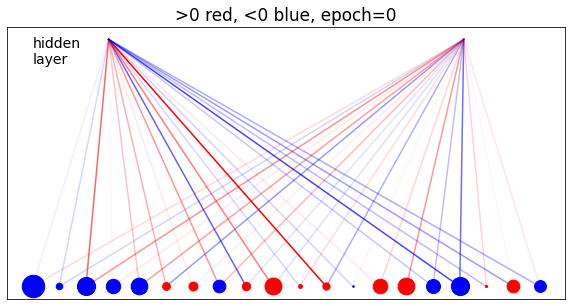

----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-8.72876393e-02 -2.21489412e-01  8.38211653e-01  3.96160518e-02
  3.27912325e-01  4.29466985e-01  1.17256826e-01  5.76885677e-01
 -8.53501017e-01  7.11674783e-01 -2.30146526e-01  1.38535434e+00
 -2.46070853e-01  1.29034856e-01  4.00935791e-04 -3.04256178e-01
 -1.01067017e+00 -3.67028188e-01 -5.39796281e-01 -4.53483232e-01]
EVALUATED ENERGIES =  [-0.73538148  0.          1.00398512 -0.6605412 ] 

PROBABILITY :  [0.38716983 0.18557924 0.06799926 0.35925167] 

CUMULATIVE PROBABILITY :  [0.38716983 0.57274907 0.64074833 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.08528764 -0.22348941  0.83621165  0.03761605  0.32991232  0.42746699
  0.11525683  0.57488568 -0.85150102  0.70967478 -0.23214653  1.38335434
 -0.24407085  0.12703486 -0.00159906 -0.30225618 -1.00867017 -0.36902819
 -0.54179628 -0.45548323]
EVALUATED ENERGIES =  [-1.28459382 -0.00296391  0.          0.        ] 

PROBABILITY :  [0.5461167  0.1515

E_rbm =  [1646.05903099 1521.79090045 1514.1443304     0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.06636529 -0.2416216   0.81679763  0.01895398  0.3369162   0.40813274
  0.09793912  0.55996924 -0.83191717  0.69079493 -0.25165977  1.36452696
 -0.23676443  0.10755008 -0.02000224 -0.31176578 -0.98875607 -0.38798964
 -0.56147484 -0.47417456]
EVALUATED ENERGIES =  [-0.72428666  0.          0.8448191  -1.24938875] 

PROBABILITY :  [0.29554907 0.14324382 0.06154257 0.49966454] 

CUMULATIVE PROBABILITY :  [0.29554907 0.43879289 0.50033546 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.         

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.05455581 -0.25182453  0.80537471  0.00829114  0.34354146  0.39709367
  0.08738558  0.55396765 -0.8201579   0.68030495 -0.26276223  1.35399625
 -0.22713751  0.09587603 -0.03051581 -0.3117019  -0.97734259 -0.39817188
 -0.57247164 -0.48497887]
EVALUATED ENERGIES =  [-0.55504076  0.36168088  0.58587121  0.        ] 

PROBABILITY :  [0.43603307 0.17433809 0.13932455 0.25030429] 

CUMULATIVE PROBABILITY :  [0.43603307 0.61037116 0.74969571 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076    0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.         

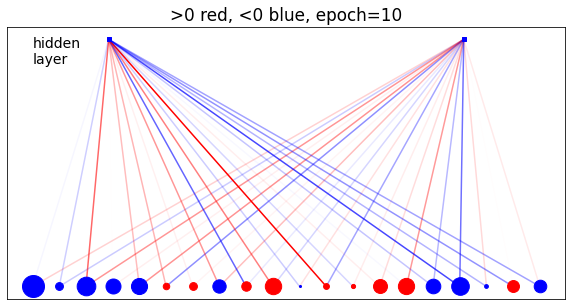

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.04885968 -0.25677126  0.799721    0.00312954  0.34697428  0.39171902
  0.08178484  0.55219625 -0.81450754  0.6749325  -0.26832542  1.3492753
 -0.22247207  0.09014628 -0.03588373 -0.31021223 -0.97181706 -0.40301133
 -0.57808187 -0.4899146 ]
EVALUATED ENERGIES =  [-0.21694074  0.          0.         -0.53591957] 

PROBABILITY :  [0.25089837 0.20196759 0.20196759 0.34516646] 

CUMULATIVE PROBABILITY :  [0.25089837 0.45286596 0.65483354 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.0468877  -0.25839034  0.7977872   0.00141421  0.34809851  0.38989304
  0.07995561  0.55196118 -0.81257493  0.67318059 -0.27016673  1.3476248
 -0.2210008   0.08823268 -0.03760055 -0.30963939 -0.96996076 -0.4046238
 -0.57999029 -0.4914937 ]
EVALUATED ENERGIES =  [ 0.42010904 -0.29771046  0.          0.        ] 

PROBABILITY :  [0.16409008 0.33637785 0.24976603 0.24976603] 

CUMULATIVE PROBABILITY :  [0.16409008 0.

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.          

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.02755856 -0.27461702  0.77883443 -0.01272415  0.35810851  0.37203933
  0.06367751  0.55661429 -0.7931894   0.65584547 -0.288045    1.33268392
 -0.21038142  0.06972409 -0.05221579 -0.29913036 -0.95067067 -0.42136963
 -0.59845123 -0.5062228 ]
EVALUATED ENERGIES =  [-0.55325099  0.          0.75381464 -1.5529348 ] 

PROBABILITY :  [0.21914866 0.1260274  0.05930447 0.59551948] 

CUMULATIVE PROBABILITY :  [0.21914866 0.34517605 0.40448052 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.       

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.0172689  -0.28289383  0.76880047 -0.02061447  0.36138595  0.36157671
  0.05578237  0.56539622 -0.78276425  0.6475402  -0.2984928   1.32508874
 -0.20799898  0.05929337 -0.05931189 -0.28844678 -0.93924822 -0.42977905
 -0.60927912 -0.51402342]
EVALUATED ENERGIES =  [-0.23194924  1.00522279  0.         -0.42864193] 

PROBABILITY :  [0.30297889 0.08792561 0.24025813 0.36883737] 

CUMULATIVE PROBABILITY :  [0.30297889 0.3909045  0.63116263 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543    0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.       

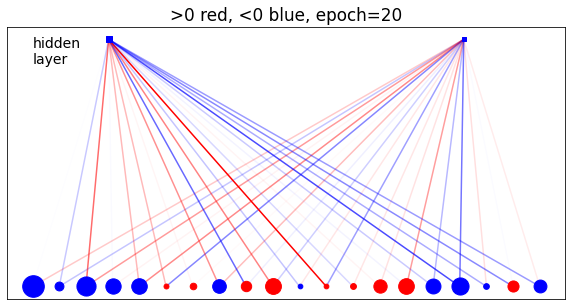

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [-0.0123915  -0.28637069  0.76396155 -0.02420995  0.36266734  0.35652039
  0.05160721  0.57112489 -0.77767079  0.64330411 -0.30353878  1.32198145
 -0.20711182  0.05447757 -0.06297795 -0.28254104 -0.93332579 -0.43392473
 -0.61455102 -0.51787062]
EVALUATED ENERGIES =  [-0.7524554   0.         -0.40848671 -0.64406306] 

PROBABILITY :  [0.32494597 0.15311718 0.23037081 0.29156605] 

CUMULATIVE PROBABILITY :  [0.32494597 0.47806314 0.70843395 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [-0.01076534 -0.28729812  0.76236268 -0.02536642  0.36335051  0.3548397
  0.05018866  0.57318753 -0.77596749  0.6419734  -0.3051999   1.32104149
 -0.20661588  0.05287314 -0.06417573 -0.28039945 -0.93138704 -0.43526289
 -0.61626543 -0.51901281]
EVALUATED ENERGIES =  [ 1.40876704 -0.39615145  0.         -0.6670632 ] 

PROBABILITY :  [0.05224238 0.31760632 0.21371881 0.41643249] 

CUMULATIVE PROBABILITY :  [0.05224238 

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.        

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.00395234 -0.2974727   0.74663135 -0.03608688  0.36564067  0.33836923
  0.0367199   0.59260638 -0.75940428  0.62829307 -0.3221736   1.31155439
 -0.20788056  0.03727556 -0.0756081  -0.25962776 -0.91333132 -0.44819862
 -0.63331575 -0.53045868]
EVALUATED ENERGIES =  [ 0.86947101 -0.40914199  0.          0.        ] 

PROBABILITY :  [0.10680393 0.38360282 0.25479663 0.25479663] 

CUMULATIVE PROBABILITY :  [0.10680393 0.49040674 0.74520337 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375    0.            0.            0.            0.
    0.            0.            0.            0.            

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.0129859  -0.3045037   0.73750381 -0.04104488  0.36759519  0.32848632
  0.02988562  0.60441303 -0.75063615  0.62103176 -0.33177157  1.30696376
 -0.20921557  0.02783491 -0.08279779 -0.24495296 -0.90299184 -0.45460595
 -0.64317303 -0.53686426]
EVALUATED ENERGIES =  [-1.25268346  0.          0.         -1.68036727] 

PROBABILITY :  [0.32204303 0.09201961 0.09201961 0.49391775] 

CUMULATIVE PROBABILITY :  [0.32204303 0.41406264 0.50608225 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742    0.
    0.            0.            0.            0.            

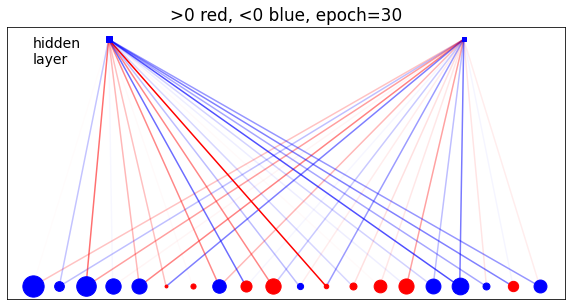

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.01754954 -0.30721639  0.73303663 -0.04327732  0.36824441  0.32372559
  0.0268925   0.61085445 -0.74634301  0.61848939 -0.33672496  1.30501191
 -0.20855704  0.02322363 -0.08642502 -0.23767044 -0.8979519  -0.45675121
 -0.64812467 -0.5396756 ]
EVALUATED ENERGIES =  [ 0.          0.          0.         -1.19893455] 

PROBABILITY :  [0.15831348 0.15831348 0.15831348 0.52505955] 

CUMULATIVE PROBABILITY :  [0.15831348 0.31662697 0.47494045 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.01907701 -0.30804049  0.73146719 -0.04372793  0.3683654   0.32212976
  0.02613197  0.6130132  -0.74479324  0.61759625 -0.3384882   1.30455852
 -0.20840719  0.02165277 -0.08765298 -0.23502446 -0.89631285 -0.45732134
 -0.64976403 -0.54057676]
EVALUATED ENERGIES =  [-0.69701095  0.          0.         -0.5573021 ] 

PROBABILITY :  [0.34894818 0.17380126 0.17380126 0.3034493 ] 

CUMULATIVE PROBABILITY :  [0.34894818

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.03425805 -0.31748457  0.71727004 -0.04986999  0.3685071   0.3067923
  0.01732233  0.63467973 -0.73033552  0.60890592 -0.35438176  1.29933356
 -0.21006348  0.00654418 -0.0973589  -0.21085305 -0.87937769 -0.46418397
 -0.66560362 -0.54986711]
EVALUATED ENERGIES =  [-0.58925863  0.          0.         -0.4249462 ] 

PROBABILITY :  [0.33807155 0.18754127 0.18754127 0.2868459 ] 

CUMULATIVE PROBABILITY :  [0.33807155 0.52561283 0.7131541  1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.52824

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.04423182 -0.32282348  0.70899003 -0.05390556  0.37030284  0.29778906
  0.01339425  0.64646649 -0.72220178  0.60453463 -0.3631609   1.29670026
 -0.20892553 -0.00243674 -0.10063584 -0.19933324 -0.86942118 -0.46773933
 -0.67427987 -0.555491  ]
EVALUATED ENERGIES =  [ 0.          0.         -0.21390444 -0.58370173] 

PROBABILITY :  [0.19876107 0.19876107 0.24616643 0.35631143] 

CUMULATIVE PROBABILITY :  [0.19876107 0.39752213 0.64368857 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

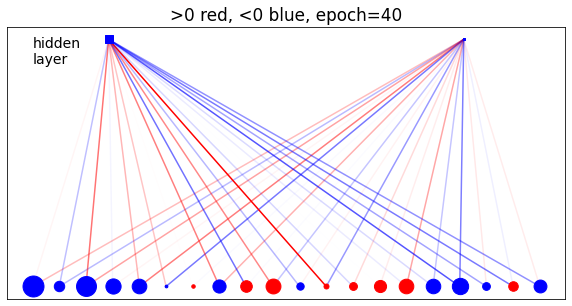

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.04889281 -0.32481785  0.70479673 -0.05584251  0.37151764  0.29339261
  0.01166562  0.65162069 -0.71791512  0.60220588 -0.3677708   1.295638
 -0.20809228 -0.00716409 -0.1017639  -0.19372616 -0.86453946 -0.4695103
 -0.6786778  -0.55808799]
EVALUATED ENERGIES =  [ 0.61521451  0.          0.         -2.54150767] 

PROBABILITY :  [0.03546908 0.0656197  0.0656197  0.83329153] 

CUMULATIVE PROBABILITY :  [0.03546908 0.10108878 0.16670847 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.05042598 -0.32539231  0.7033688  -0.05650402  0.37179786  0.29189654
  0.01114727  0.65340384 -0.71631444  0.60139536 -0.36929396  1.29507024
 -0.20789141 -0.00880366 -0.10211068 -0.19171918 -0.86290833 -0.470103
 -0.68022571 -0.55884517]
EVALUATED ENERGIES =  [ 0.04983836  0.         -0.13819638 -0.75450768] 

PROBABILITY :  [0.18204289 0.1913455  0.2197031  0.40690851] 

CUMULATIVE PROBABILITY :  [0.18204289 0.37

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.           

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.06522146 -0.32730126  0.68891223 -0.06183659  0.37430665  0.27763413
  0.00688879  0.67183351 -0.70293177  0.59360947 -0.38274946  1.29182934
 -0.20911707 -0.02326426 -0.10377987 -0.17276044 -0.84865536 -0.47314747
 -0.69470198 -0.56487778]
EVALUATED ENERGIES =  [-0.55704032  0.         -0.29865853 -0.42110508] 

PROBABILITY :  [0.3107422  0.17802488 0.2399863  0.27124661] 

CUMULATIVE PROBABILITY :  [0.3107422  0.48876709 0.72875339 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.07396401 -0.32796831  0.68098962 -0.06238503  0.37565774  0.26953719
  0.00708828  0.68376263 -0.69494311  0.59002006 -0.38956503  1.29089266
 -0.20943512 -0.03066308 -0.10424443 -0.16081356 -0.84073983 -0.47339315
 -0.70217737 -0.56733784]
EVALUATED ENERGIES =  [ 0.         -0.43769551  0.          0.35083394] 

PROBABILITY :  [0.23511522 0.36422478 0.23511522 0.16554478] 

CUMULATIVE PROBABILITY :  [0.23511522 0.59934    0.83445522 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

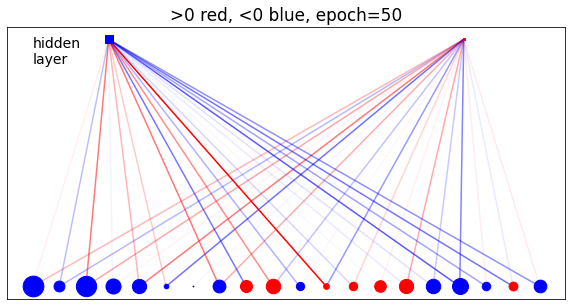

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.07787311 -0.3274951   0.67723091 -0.06229416  0.37564044  0.26591641
  0.00774596  0.68946273 -0.69119357  0.58829821 -0.39283285  1.29104103
 -0.2095904  -0.033826   -0.10542252 -0.15451648 -0.83689815 -0.47308788
 -0.70552885 -0.56878458]
EVALUATED ENERGIES =  [0.         0.47338902 0.1135767  0.        ] 

PROBABILITY :  [0.28445266 0.17718207 0.25391261 0.28445266] 

CUMULATIVE PROBABILITY :  [0.28445266 0.46163473 0.71554734 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.07907927 -0.32755349  0.67594953 -0.06216983  0.37570635  0.26470762
  0.007671    0.69121461 -0.69001629  0.58761366 -0.3940061   1.2911189
 -0.21004464 -0.03483487 -0.10581093 -0.15257578 -0.83565665 -0.47315887
 -0.70664777 -0.56934197]
EVALUATED ENERGIES =  [-0.90485563 -0.04285873 -0.60157507  0.30015421] 

PROBABILITY :  [0.40643816 0.17164612 0.30011065 0.12180507] 

CUMULATIVE PROBABILITY :  [0.40643816 0.57

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861  964.48274156  973.70175784
  969.18773345  943.46628258  896.35406325  940.31491768  861.4131628
  901.70647399  949.3813416   876.78102624    0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.          

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.09202709 -0.32550796  0.66472795 -0.05980918  0.37534488  0.25351119
  0.01263187  0.71033871 -0.67882603  0.58541071 -0.40548648  1.29522131
 -0.21375657 -0.04343312 -0.10721835 -0.13146159 -0.82228681 -0.47118229
 -0.71743377 -0.57222618]
EVALUATED ENERGIES =  [ 1.6701527   0.02250052 -0.94414168  0.        ] 

PROBABILITY :  [0.03973722 0.20642568 0.54271409 0.21112301] 

CUMULATIVE PROBABILITY :  [0.03973722 0.2461629  0.78887699 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.09967909 -0.32435168  0.65885913 -0.06008823  0.37120406  0.24755885
  0.01611271  0.72197222 -0.67152984  0.58468896 -0.41120827  1.2952161
 -0.21302106 -0.04944313 -0.10743906 -0.1195894  -0.81375817 -0.4687337
 -0.72400509 -0.57528818]
EVALUATED ENERGIES =  [ 0.          0.24831367 -0.84376565 -0.34135953] 

PROBABILITY :  [0.18141971 0.14152828 0.42182007 0.25523195] 

CUMULATIVE PROBABILITY :  [0.18141971 0.32294799 0.74476805 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.528245

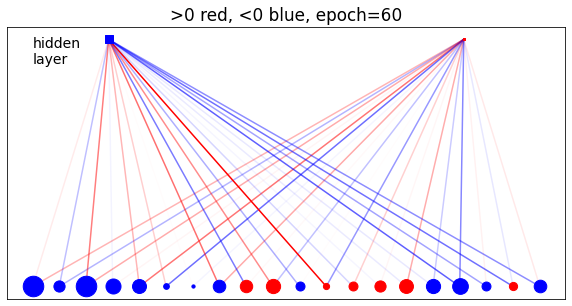

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.10297345 -0.3247279   0.65617531 -0.06124493  0.36816718  0.24450153
  0.01751948  0.72699049 -0.66834645  0.58314388 -0.41331384  1.29407373
 -0.21370508 -0.05252468 -0.10760175 -0.11468548 -0.81020648 -0.46785183
 -0.72741187 -0.57694198]
EVALUATED ENERGIES =  [ 0.         -0.32153463  0.         -1.0485099 ] 

PROBABILITY :  [0.16044568 0.22129355 0.16044568 0.45781509] 

CUMULATIVE PROBABILITY :  [0.16044568 0.38173923 0.54218491 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.10411599 -0.32498604  0.65531021 -0.06158493  0.36769448  0.24336156
  0.01809026  0.72857063 -0.66733515  0.58279993 -0.41408139  1.29374996
 -0.21401933 -0.05349765 -0.10757528 -0.11311185 -0.8090392  -0.46760385
 -0.72847913 -0.57749121]
EVALUATED ENERGIES =  [ 1.27158049  0.          0.19596808 -1.30235407] 

PROBABILITY :  [0.04850694 0.17299927 0.14221206 0.63628173] 

CUMULATIVE PROBABILITY :  [0.04850694

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861  964.48274156  973.70175784
  969.18773345  943.46628258  896.35406325  940.31491768  861.4131628
  901.70647399  949.3813416   876.78102624  912.81100224  932.02812701
  923.51060018  939.57919092  951.96861094  912.01378828  943.0470085
  896.21799212  898.00852093  949.51773601    0.            0.
    0.            0.            0.            0.            0.
    0.         

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.11538987 -0.32917061  0.64761007 -0.06556555  0.36145528  0.23378582
  0.02127735  0.74337701 -0.65920662  0.58142505 -0.42086654  1.28971148
 -0.21770975 -0.06306487 -0.10726894 -0.09740823 -0.79915653 -0.46376489
 -0.73915394 -0.58141151]
EVALUATED ENERGIES =  [-0.72768463 -0.00656467  0.          0.41793962] 

PROBABILITY :  [0.43720457 0.2125721  0.21118121 0.13904213] 

CUMULATIVE PROBABILITY :  [0.43720457 0.64977667 0.86095787 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.12107333 -0.3319545   0.64417951 -0.06601425  0.35734289  0.22915127
  0.02411907  0.75177128 -0.65453037  0.58010889 -0.42488808  1.29003354
 -0.22277303 -0.06721581 -0.10669321 -0.0872562  -0.79281143 -0.46185458
 -0.74554681 -0.58191689]
EVALUATED ENERGIES =  [ 1.00177637  0.         -0.57215746 -0.30482331] 

PROBABILITY :  [0.08168399 0.22243487 0.39417375 0.30170739] 

CUMULATIVE PROBABILITY :  [0.08168399 0.30411886 0.69829261 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

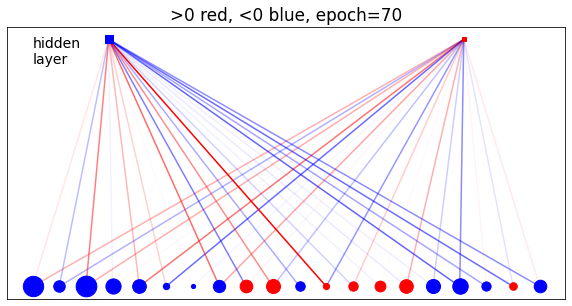

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.1241982  -0.33253996  0.64254819 -0.06631994  0.35695349  0.22662159
  0.02598324  0.75606346 -0.65209481  0.58028182 -0.4265006   1.28986658
 -0.22561778 -0.06918714 -0.10611501 -0.0813479  -0.78903837 -0.46061498
 -0.7487795  -0.5821879 ]
EVALUATED ENERGIES =  [-0.3166617  -0.21597294 -0.03361548  0.        ] 

PROBABILITY :  [0.29530961 0.2670232  0.22251135 0.21515584] 

CUMULATIVE PROBABILITY :  [0.29530961 0.56233281 0.78484416 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.12517095 -0.33274353  0.64196727 -0.06620813  0.35678016  0.22582913
  0.02643113  0.75753194 -0.65124021  0.57992743 -0.42696805  1.29003269
 -0.22666229 -0.0699018  -0.10582431 -0.07929232 -0.7877599  -0.46031796
 -0.74974456 -0.58242698]
EVALUATED ENERGIES =  [0.         0.03709716 0.         0.        ] 

PROBABILITY :  [0.25229701 0.24310898 0.25229701 0.25229701] 

CUMULATIVE PROBABILITY :  [0.25229701 0.4

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861  964.48274156  973.70175784
  969.18773345  943.46628258  896.35406325  940.31491768  861.4131628
  901.70647399  949.3813416   876.78102624  912.81100224  932.02812701
  923.51060018  939.57919092  951.96861094  912.01378828  943.0470085
  896.21799212  898.00852093  949.51773601  918.83070736  914.67385043
  888.04883047  896.18600888  906.88603431  910.79014903  973.5787148


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.133842   -0.33628592  0.63520247 -0.06467474  0.35042476  0.216926
  0.02913303  0.77391519 -0.64386007  0.57716376 -0.43465697  1.29230527
 -0.23573354 -0.07681954 -0.1086715  -0.05982724 -0.77755511 -0.45840594
 -0.75838429 -0.58593416]
EVALUATED ENERGIES =  [-0.20375596  0.7662356  -0.84702812 -0.01332432] 

PROBABILITY :  [0.24340464 0.09227135 0.46312519 0.20119883] 

CUMULATIVE PROBABILITY :  [0.24340464 0.33567599 0.79880117 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.528245

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.13762111 -0.33604025  0.63036231 -0.0633031   0.34510527  0.21100276
  0.0309848   0.78396565 -0.639064    0.57538287 -0.43911488  1.29192937
 -0.24056771 -0.08175247 -0.10970724 -0.04932648 -0.77182597 -0.45579135
 -0.76282402 -0.59121205]
EVALUATED ENERGIES =  [ 0.         -0.03963097 -0.62481327  0.00332176] 

PROBABILITY :  [0.20387328 0.21211522 0.38081432 0.20319719] 

CUMULATIVE PROBABILITY :  [0.20387328 0.4159885  0.79680281 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

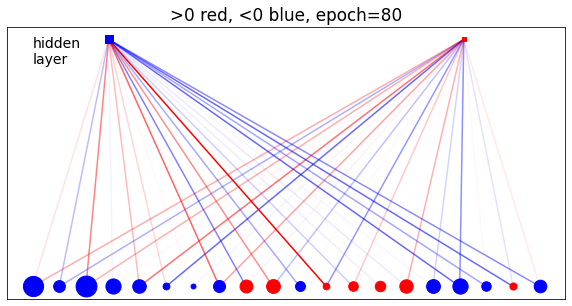

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.13943357 -0.33430037  0.62786173 -0.06229553  0.34243917  0.20811496
  0.03335498  0.78897415 -0.63684257  0.57497898 -0.44110257  1.29227267
 -0.24338601 -0.08429287 -0.10824489 -0.04419355 -0.76883888 -0.45433739
 -0.7649479  -0.59322293]
EVALUATED ENERGIES =  [ 0.         -0.26203924  0.22536001 -0.03722536] 

PROBABILITY :  [0.24179509 0.31423147 0.19300781 0.25096563] 

CUMULATIVE PROBABILITY :  [0.24179509 0.55602656 0.74903437 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.13997316 -0.33397289  0.6271475  -0.06192028  0.34169618  0.20727683
  0.03398824  0.79042092 -0.63619398  0.57483808 -0.44172371  1.29242511
 -0.24406356 -0.08513567 -0.10795166 -0.0425134  -0.76795437 -0.45381209
 -0.76560993 -0.59385276]
EVALUATED ENERGIES =  [-0.6318579  -0.68762767  0.          0.        ] 

PROBABILITY :  [0.32045523 0.3388347  0.17035503 0.17035503] 

CUMULATIVE PROBABILITY :  [0.32045523

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861  964.48274156  973.70175784
  969.18773345  943.46628258  896.35406325  940.31491768  861.4131628
  901.70647399  949.3813416   876.78102624  912.81100224  932.02812701
  923.51060018  939.57919092  951.96861094  912.01378828  943.0470085
  896.21799212  898.00852093  949.51773601  918.83070736  914.67385043
  888.04883047  896.18600888  906.88603431  910.79014903  973.5787148


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.14555405 -0.32809629  0.62081691 -0.06132606  0.33404709  0.19967635
  0.04116251  0.80417142 -0.62884311  0.5732847  -0.44499014  1.29064267
 -0.25288779 -0.09346899 -0.10008302 -0.02751333 -0.75943717 -0.44368059
 -0.77278534 -0.60136663]
EVALUATED ENERGIES =  [-0.38024605  0.09487255 -0.38037609  0.34116818] 

PROBABILITY :  [0.32174973 0.20006762 0.32179157 0.15639108] 

CUMULATIVE PROBABILITY :  [0.32174973 0.52181735 0.84360892 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861  964.48274156  973.70175784
  969.18773345  943.46628258  896.35406325  940.31491768  861.4131628
  901.70647399  949.3813416   876.78102624  912.81100224  932.02812701
  923.51060018  939.57919092  951.96861094  912.01378828  943.0470085
  896.21799212  898.00852093  949.51773601  918.83070736  914.67385043
  888.04883047  896.18600888  906.88603431  910.79014903  973.5787148


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861  964.48274156  973.70175784
  969.18773345  943.46628258  896.35406325  940.31491768  861.4131628
  901.70647399  949.3813416   876.78102624  912.81100224  932.02812701
  923.51060018  939.57919092  951.96861094  912.01378828  943.0470085
  896.21799212  898.00852093  949.51773601  918.83070736  914.67385043
  888.04883047  896.18600888  906.88603431  910.79014903  973.5787148


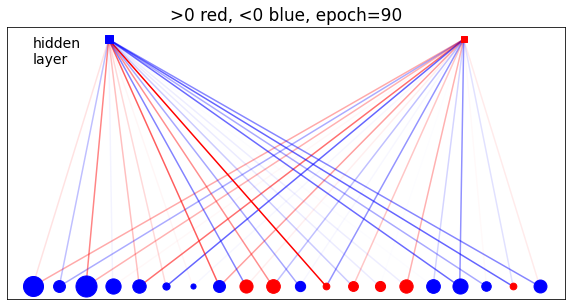

l_rate =  1.0
----initiating backward CD: k =  0 ----
WEIGHTS[0] :  [ 0.14894569 -0.32307884  0.61549215 -0.06193815  0.32357555  0.19415017
  0.04597212  0.81523924 -0.62648519  0.57261424 -0.44637384  1.28825844
 -0.26477363 -0.10056204 -0.09045727 -0.01694605 -0.75285729 -0.43444626
 -0.77935131 -0.60888521]
EVALUATED ENERGIES =  [ 0.         -1.08873779  0.         -0.65266809] 

PROBABILITY :  [0.14511301 0.43106144 0.14511301 0.27871254] 

CUMULATIVE PROBABILITY :  [0.14511301 0.57617445 0.72128746 1.        ] 


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.14939976 -0.32299727  0.61511434 -0.06220747  0.32263259  0.19353
  0.04645354  0.81638647 -0.62639403  0.57274976 -0.4465286   1.28798016
 -0.26631858 -0.10128508 -0.08947424 -0.01564951 -0.75222797 -0.43375185
 -0.78002428 -0.60941913]
EVALUATED ENERGIES =  [ 0.          0.65971484 -0.98899892  0.68758619] 

PROBABILITY :  [0.21238959 0.10980515 0.57101827 0.10678699] 

CUMULATIVE PROBABILITY :  [0.21238959 0.

----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.15099949 -0.32345489  0.61369896 -0.06276529  0.31953057  0.19102458
  0.04781495  0.82070648 -0.62617512  0.57229059 -0.44742925  1.28803715
 -0.27169557 -0.10389042 -0.08700072 -0.01053984 -0.74972656 -0.43199525
 -0.78231152 -0.61164462]
EVALUATED ENERGIES =  [ 1.91412378  0.         -1.12679361  0.        ] 

PROBABILITY :  [0.02817979 0.19108703 0.58964614 0.19108703] 

CUMULATIVE PROBABILITY :  [0.02817979 0.21926683 0.80891297 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861  964.48274156  973.70175784
  969.18773345  943.46628258  896.35406325  940.31491768  861.4131628
  901.70647399  949.3813416   876.78102624  912.81100224  932.02812701
  923.51060018  939.57919092  951.96861094  912.01378828  943.0470085
  896.21799212  898.00852093  949.51773601  918.83070736  914.67385043
  888.04883047  896.18600888  906.88603431  910.79014903  973.5787148


----initiating backward CD: k =  500 ----
WEIGHTS[0] :  [ 0.15472267 -0.32609213  0.60957293 -0.06225005  0.30840625  0.18531125
  0.05021174  0.83241207 -0.62601573  0.56894083 -0.44969696  1.28960624
 -0.2817893  -0.11117372 -0.0841173   0.00312159 -0.74435193 -0.42713985
 -0.78860654 -0.61636351]
EVALUATED ENERGIES =  [ 0.         -0.06289614 -0.50438666  0.37298972] 

PROBABILITY :  [0.22678009 0.2415018  0.37554093 0.15617717] 

CUMULATIVE PROBABILITY :  [0.22678009 0.4682819  0.84382283 1.        ] 


E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282

E_rbm =  [1646.05903099 1521.79090045 1514.1443304  1467.57967646 1491.23233644
 1468.40034458 1380.61149613 1388.52389764 1412.02663076 1397.94255977
 1356.44394531 1333.36623803 1324.43738333 1248.89639742 1239.61308169
 1159.63841173 1149.17845797 1217.12082548 1263.65054543 1113.27097177
 1144.06736096 1240.4217279  1117.87103664 1193.67677394 1073.17653534
 1117.10262375 1211.03872628 1144.00761105 1071.10300742 1139.46100236
 1046.31604468 1125.92718638 1077.29757728 1047.5282458  1006.56833551
 1034.19657541 1001.87719678 1020.28231564  966.20282305 1010.61603656
  999.95073492 1030.72395467  947.18036861  964.48274156  973.70175784
  969.18773345  943.46628258  896.35406325  940.31491768  861.4131628
  901.70647399  949.3813416   876.78102624  912.81100224  932.02812701
  923.51060018  939.57919092  951.96861094  912.01378828  943.0470085
  896.21799212  898.00852093  949.51773601  918.83070736  914.67385043
  888.04883047  896.18600888  906.88603431  910.79014903  973.5787148


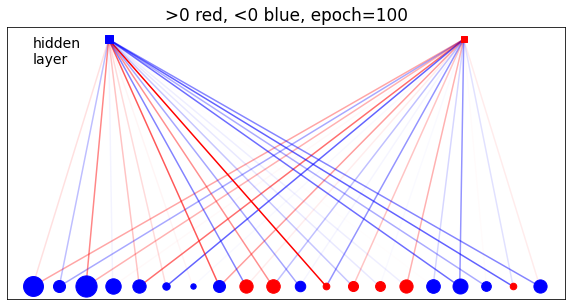

l_rate =  1.0


In [9]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)
N = 1000
Nv = 20
epochs = 100

# learning rate
l_rate = 1.0

# initialize Adam 
beta1=0.9
beta2=0.999
epsilon=1e-8
m_dw, v_dw = 0, 0
m_db, v_db = 0, 0
m_da, v_da = 0, 0

beta=0.9

t=1

#covariance
cov_sum = np.zeros(epochs)

#energies
E_rbm = np.zeros(epochs)
E_d = np.zeros(epochs)

V = []

# minibatch
mini, m = 500, 0
steps=10
# train model
print('===================================================')
for epoch in range(epochs):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        hf = h
        vf = v[k]
        for i in range(steps):
            vf,_ = activate_back(vf,hf,w,a,k,i)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
        
        V.append(vf)
        
        
        # update energies of the state for each row
        E_rbm[epoch] += E(vf,h)
        E_d[epoch] += E(v[k],h)
    
        m += 1
        # minibatch
        
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)       
            db = l_rate_m*(h_data - h_model)
            
            if epoch<=200: #ADAM
                ##********update***********##
                m_dw = beta1*m_dw + (1-beta1)*(vh_data - vh_model)
                m_db = beta1*m_db + (1-beta1)*(h_data - h_model)
                m_da = beta1*m_da + (1-beta1)*(v_data - v_model)

                ## rms beta 2
                v_dw = beta2*v_dw + (1-beta2)*((vh_data - vh_model)**2)
                v_db = beta2*v_db + (1-beta2)*((h_data - h_model)**2)
                v_da = beta2*v_da + (1-beta2)*((v_data - v_model)**2)

                ## bias correction
                m_dw_corr = m_dw/(1-beta1**t)
                m_db_corr = m_db/(1-beta1**t)
                m_da_corr = m_da/(1-beta1**t)

                v_dw_corr = v_dw/(1-beta2**t)
                v_db_corr = v_db/(1-beta2**t)
                v_da_corr = v_da/(1-beta2**t)
            
                ## update weights and biases
                w = w - l_rate_m*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
                b = b - l_rate_m*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
                a = a - l_rate_m*(m_da_corr/(np.sqrt(v_da_corr)+epsilon))
                m=0
                t=t+1 #update the time
                
            else: #RMSprop
                v_dw = beta*v_dw + (1-beta)*((vh_data - vh_model)**2)
                v_db = beta*v_db + (1-beta)*((h_data - h_model)**2)
                v_da = beta*v_da + (1-beta)*((v_data - v_model)**2)
                w = w - l_rate_m*((vh_data - vh_model)/(np.sqrt(v_dw+epsilon)))
                b = b - l_rate_m*((h_data - h_model)/(np.sqrt(v_db+epsilon)))
                a = a - l_rate_m*((v_data - v_model)/(np.sqrt(v_da+epsilon)))

                m=0
            
            if epoch%10==9 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
                print('vh_data \n', vh_data, '\n')
                print('vh_model \n',vh_model)

    Vf = np.array(V)
    cov_vf = np.cov(Vf)
    #covariance:
    for j in range(0,N):
        for i in range(0, j):
            cov_sum[epoch]+=(cov_vf[i,j]-cov_data[i,j])**2
    cov_sum[epoch] = (cov_sum[epoch]*2)/(Nv*(Nv-1))
        
    print('E_rbm = ', E_rbm)
    print('E_data = ', E_d)
    # randomize the order of input data
    np.random.shuffle(v)
    V = []
    # decrease the learning rate (here as a power law)
    #l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)


In [34]:
print(Vf[4])

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]


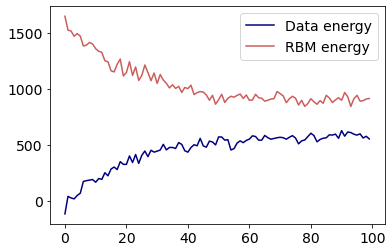

In [10]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), E_d, label='Data energy', color='navy')
ax.plot(np.arange(epochs), E_rbm, label='RBM energy', color='indianred')
ax.legend(loc='best')

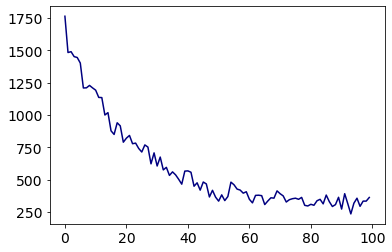

In [11]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), E_rbm-E_d, label='difference', color='navy')

## Covariance matrix


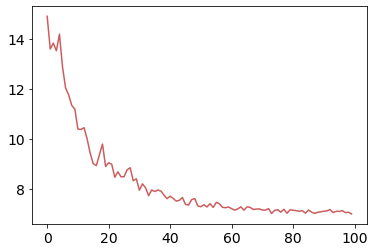

In [12]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), cov_sum, label='difference', color='indianred')

# Optional 5. plot the weights 


Plot the weights wiμ of each hidden unit μ
in an A×G table, with a color map preserving the
rule that red means positive and blue
means negative weight

In [13]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)


w0= [[-8.72876393e-02  2.04222126e-01]
 [-2.21489412e-01 -2.36964198e-01]
 [ 8.38211653e-01  5.94150244e-01]
 [ 3.96160518e-02  1.20136963e-01]
 [ 3.27912325e-01  5.31481557e-01]
 [ 4.29466985e-01 -5.52710538e-01]
 [ 1.17256826e-01  9.76087795e-02]
 [ 5.76885677e-01  3.77974741e-01]
 [-8.53501017e-01 -1.58554191e-01]
 [ 7.11674783e-01 -1.87006764e-01]
 [-2.30146526e-01  2.03387092e-01]
 [ 1.38535434e+00 -4.35452880e-01]
 [-2.46070853e-01  5.29254898e-02]
 [ 1.29034856e-01  2.23337160e-01]
 [ 4.00935791e-04  5.73002421e-01]
 [-3.04256178e-01 -3.54405060e-01]
 [-1.01067017e+00 -7.93431066e-01]
 [-3.67028188e-01  2.38846755e-01]
 [-5.39796281e-01  5.10944576e-02]
 [-4.53483232e-01  1.41941667e-01]]
a0= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957  0.12209994
  0.16117297 -0.3214583   0.14126068  0.57553201  0.02979552  0.10518219
 -0.0050578   0.4284531   0.56591768 -0.39197445 -0.6605412   0.00945954
  0.32336713 -0.28164852]
b0= [0. 0.]
w= [[ 0.0227721   0.31377005]
 [-0

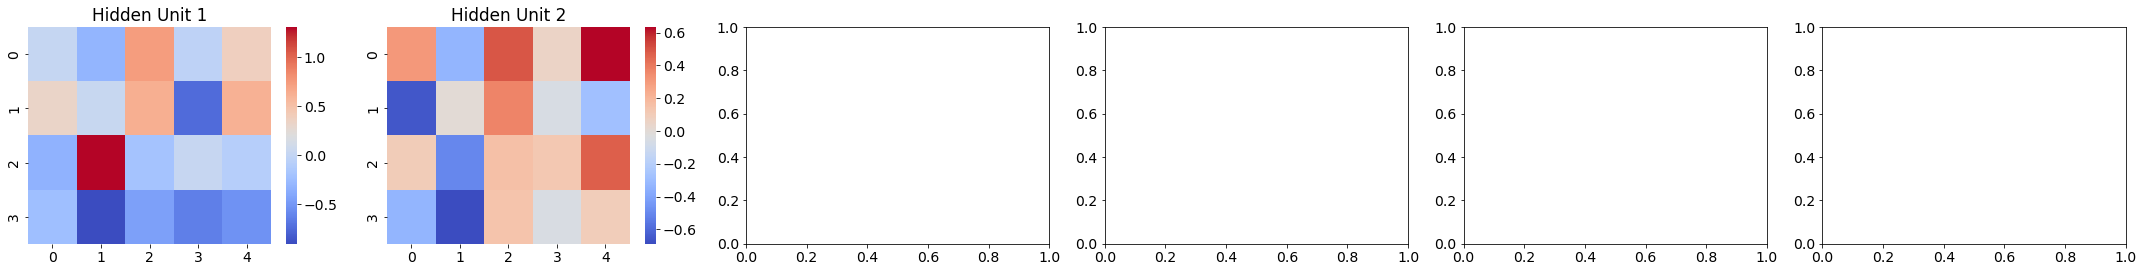

In [38]:
w1=[w[:,i].reshape(4,5) for i in range(M)]
import seaborn as sns

fig, axs = plt.subplots(ncols=6, figsize=(5*6,4))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs[i])
    axs[i].set_title(f'Hidden Unit {i+1}')
    plt.tight_layout()
plt.show()

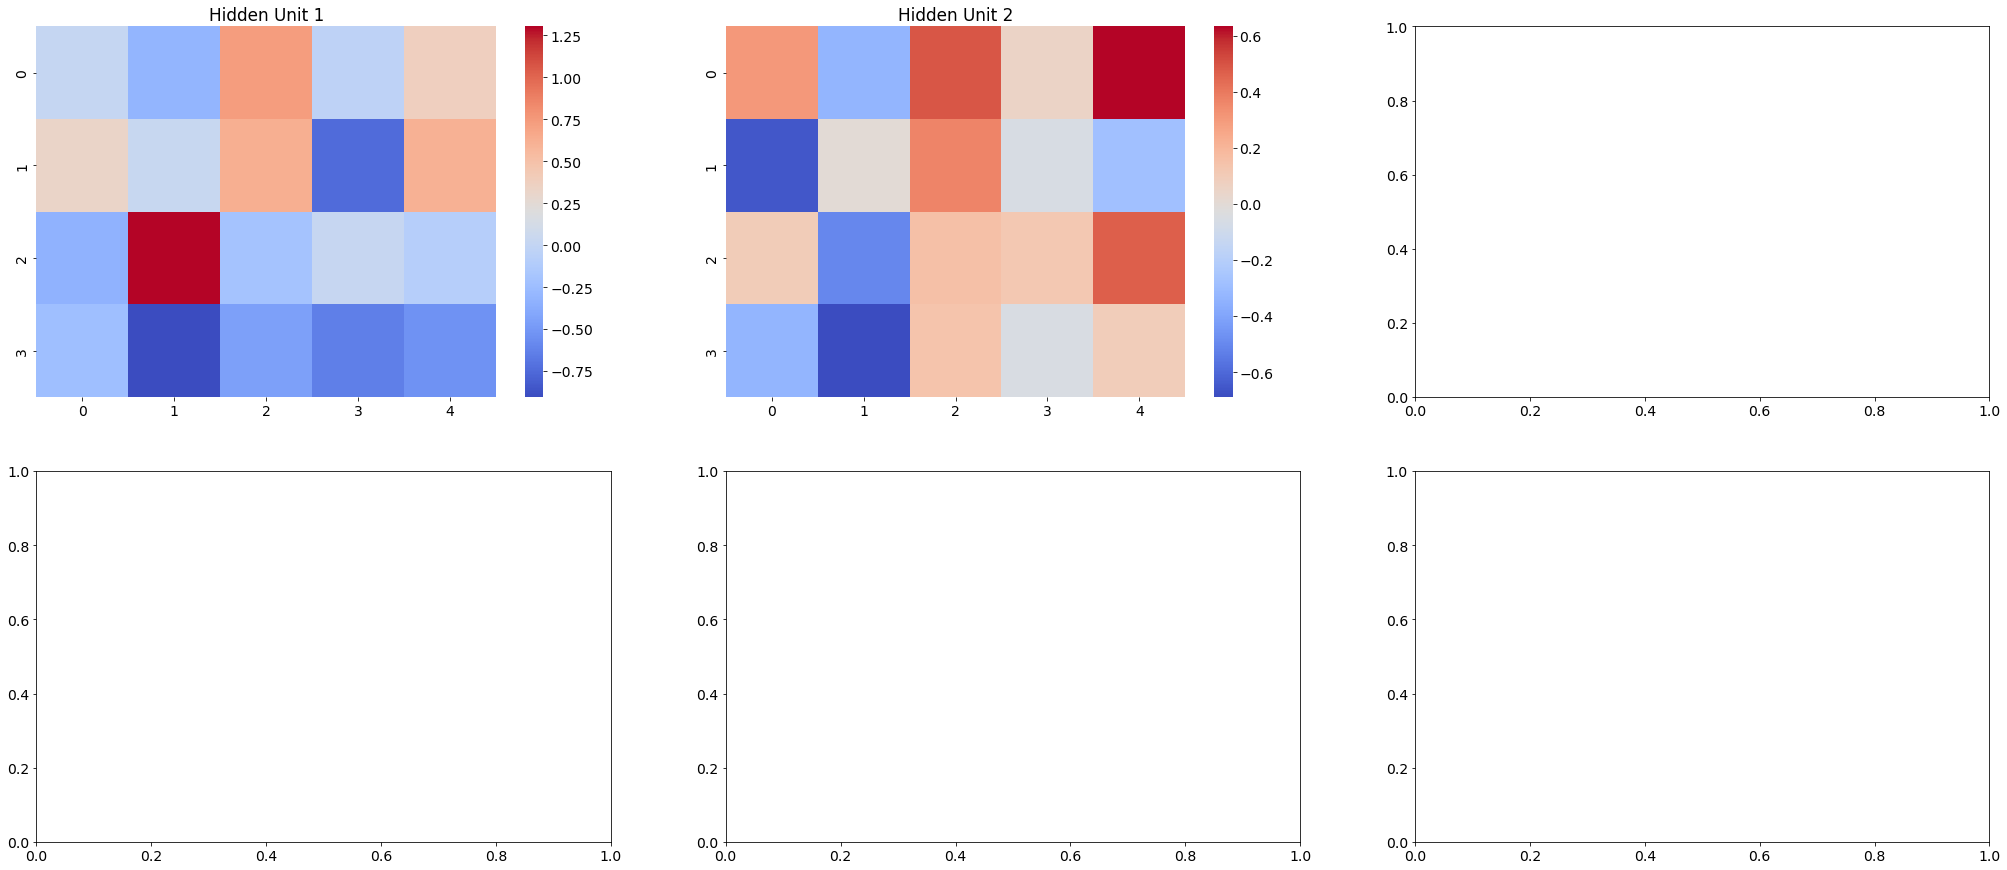

In [39]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(35,15))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs.flat[i])
    axs.flat[i].set_title(f'Hidden Unit {i+1}')
plt.show()



In [16]:
A = np.array(([1,2,3],[4,3,2],[6,5,4],[1,1,1]))

for j in range(0,3):
        for i in range(0, j):
            print('J=',j)
            print(A[i,j])

J= 1
2
J= 2
3
J= 2
2
